# INLAB-1

# Implement the decision tree algorithm on the given data.

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\saket\OneDrive\Desktop\DWDM\LAB-4\Fruit.csv")
df

,Weight(grams),Smooth(Range of 1 to 10),Fruit
0,170,9,1
1,175,10,1
2,180,8,1
3,178,8,1
4,182,7,1
5,130,3,0
6,120,4,0
7,130,2,0
8,138,5,0
9,145,6,0


Accuracy: 1.0


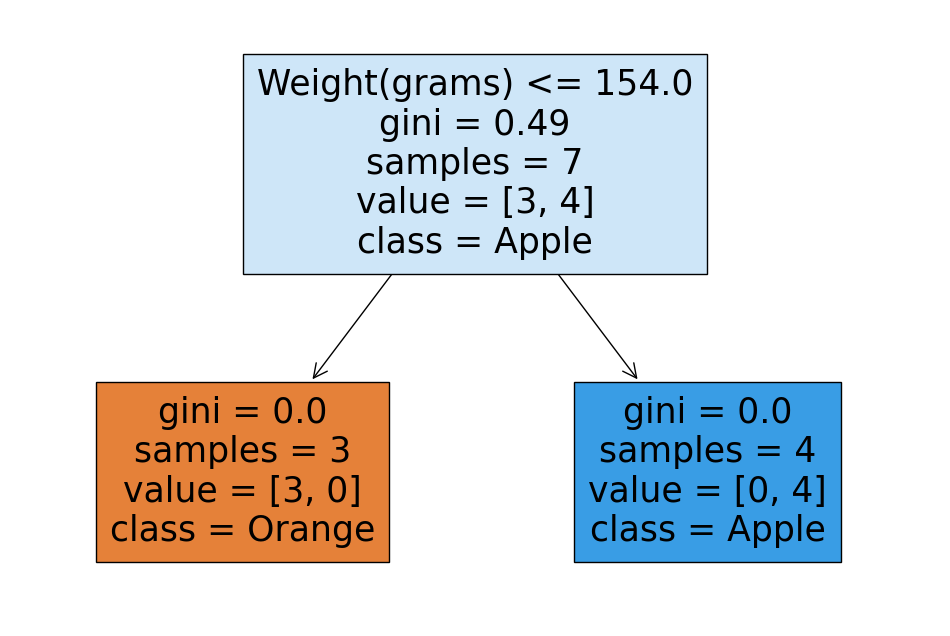

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt

# Features and labels
X = df[['Weight(grams)', 'Smooth(Range of 1 to 10)']]
y = df['Fruit']

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree classifier
clf = DecisionTreeClassifier()

# Train Decision Tree classifier
clf = clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['Orange', 'Apple'])
plt.show()


# INLAB-2

# a)Load the Diabetes Dataset and Calculate the Correlation Matrix

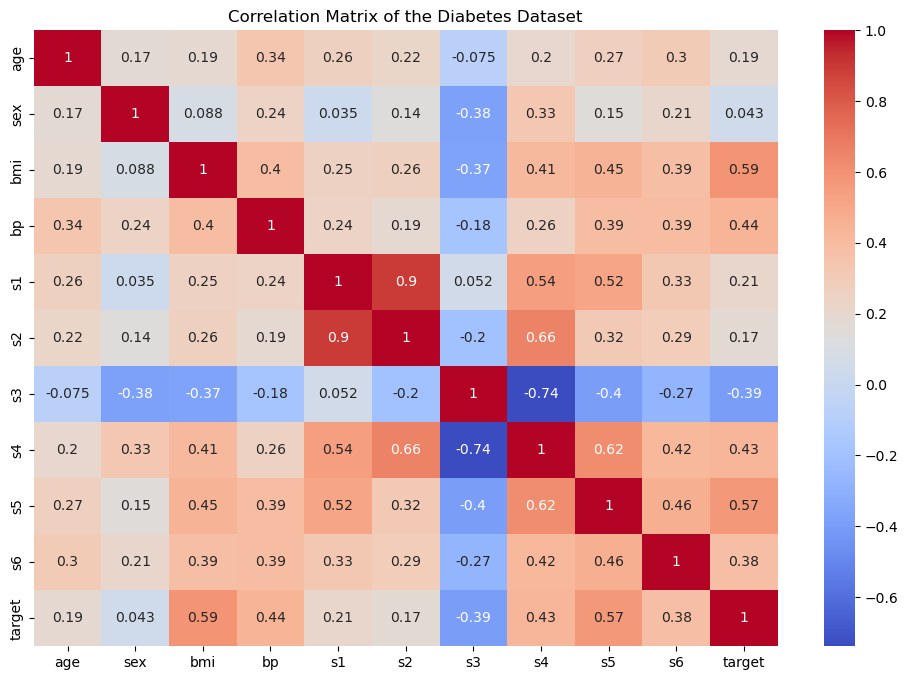

In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# Calculate the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of the Diabetes Dataset')
plt.show()


# b)Split the Dataset into Train and Test Sets

In [15]:
from sklearn.model_selection import train_test_split

# Features and labels
X = df.drop(columns=['target'])
y = df['target']

# Split the dataset into training and testing (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# c)Train Decision Tree Models with Gini and Entropy

In [16]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree with Gini index
gini_tree = DecisionTreeRegressor(criterion='squared_error', random_state=42)
gini_tree.fit(X_train, y_train)

# Decision Tree with Entropy (Information Gain)
entropy_tree = DecisionTreeRegressor(criterion='absolute_error', random_state=42)
entropy_tree.fit(X_train, y_train)


DecisionTreeRegressor(criterion='absolute_error', random_state=42)

# d)Make Predictions on the Test Set

In [17]:
# Predictions using Gini index
gini_predictions = gini_tree.predict(X_test)

# Predictions using Entropy (Information Gain)
entropy_predictions = entropy_tree.predict(X_test)


# e)Define Custom Accuracy Score Function

In [18]:
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Fraction Number of correct predictions
gini_accuracy = accuracy_score(y_test, gini_predictions.round())
entropy_accuracy = accuracy_score(y_test, entropy_predictions.round())

print(f"Gini Accuracy: {gini_accuracy}")
print(f"Entropy Accuracy: {entropy_accuracy}")


Gini Accuracy: 0.0
Entropy Accuracy: 0.015037593984962405


# f)Calculate Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Gini
gini_cm = confusion_matrix(y_test.round(), gini_predictions.round())
print("Confusion Matrix for Gini:")
print(gini_cm)

# Confusion matrix for Entropy
entropy_cm = confusion_matrix(y_test.round(), entropy_predictions.round())
print("Confusion Matrix for Entropy:")
print(entropy_cm)


Confusion Matrix for Gini:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Confusion Matrix for Entropy:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
